# When and how much have our participants walked?

In [35]:
typee='steps'

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.ticker as mticker
import matplotlib.dates as md
import datetime

In [37]:
cmap = ["#7570b3", "#1d84c6", "#0095bf", "#00a0a1", "#00a676", "#3da95b", "#63aa3a", 
          "#88a906", "#a0ab00", "#b7ac00", "#cfac00", "#e6ab01"]

sns.set_palette(sns.color_palette(cmap))

In [38]:
# Loading the data
infile = open('../data/users_%s_hourly'%typee,'rb')
typee_hourly = pickle.load(infile)
infile.close()

typee_hourly # year-month-day e.g. 2021-05-24

,date,steps,id
0,2015-09-22 21:00:00,0,621e314867b776a24029ebf9
1,2015-09-22 22:00:00,5025,621e314867b776a24029ebf9
2,2015-09-22 23:00:00,98,621e314867b776a24029ebf9
3,2015-09-23 00:00:00,63,621e314867b776a24029ebf9
4,2015-09-23 01:00:00,23,621e314867b776a24029ebf9
...,...,...,...
218406,2022-02-11 05:00:00,529,621e346f67b776a24081744f
218407,2022-02-11 06:00:00,26,621e346f67b776a24081744f
218408,2022-02-11 07:00:00,88,621e346f67b776a24081744f
218409,2022-02-11 08:00:00,478,621e346f67b776a24081744f


In [39]:
typee_hourly.reset_index(inplace=True)

# Preprocessing 
typee_hourly['date'] = pd.to_datetime(typee_hourly.date, format='%m/%d/%y %H:%M:%S') 
typee_hourly[typee] = pd.to_numeric(typee_hourly[typee])
typee_hourly = typee_hourly.astype({"id": str})
typee_hourly = typee_hourly.sort_values('date')
#typee_hourly

In [40]:
typee_hourly=typee_hourly.resample('H', on='date').mean()
typee_hourly.reset_index(inplace=True)
#typee_hourly

In [41]:
# Splitting timestamp column into two separate date and time columns
typee_hourly['Dates'] = pd.to_datetime(typee_hourly['date']).dt.date
typee_hourly['Time'] = pd.to_datetime(typee_hourly['date']).dt.time
#typee_hourly

In [42]:
# Converting date to day of the week
typee_hourly['DayName'] = pd.Series(typee_hourly['date'].dt.day_name(), index=typee_hourly.index) 
# Days of the week in ascending order
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# Seperating the two rounds
typee_hourly['Dates'] = pd.to_datetime(typee_hourly.Dates, format='%Y/%m/%d') 
df1 = typee_hourly[(typee_hourly['Dates'] >= "2021-05-24") & (typee_hourly['Dates'] <= "2021-07-26")] #Round1
df2 = typee_hourly[(typee_hourly['Dates'] >= "2021-11-15") & (typee_hourly['Dates'] <= "2022-01-17")] #Round2
# Both rounds
df=df1.append(df2)
df.DayName = pd.Categorical(df.DayName,categories=weekdays)
df = df.sort_values('DayName')
# Rearranging the dataframe for the heatmap
df['Time'] = pd.to_datetime(df['date']).dt.time
days=df['DayName']
hours=df['Time']
freq=df[typee]
df=pd.concat([days,hours,freq],axis=1)
piv = pd.pivot_table(df, values=typee,index=["Time"], columns=["DayName"], fill_value=0)

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_4728/3737452218.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


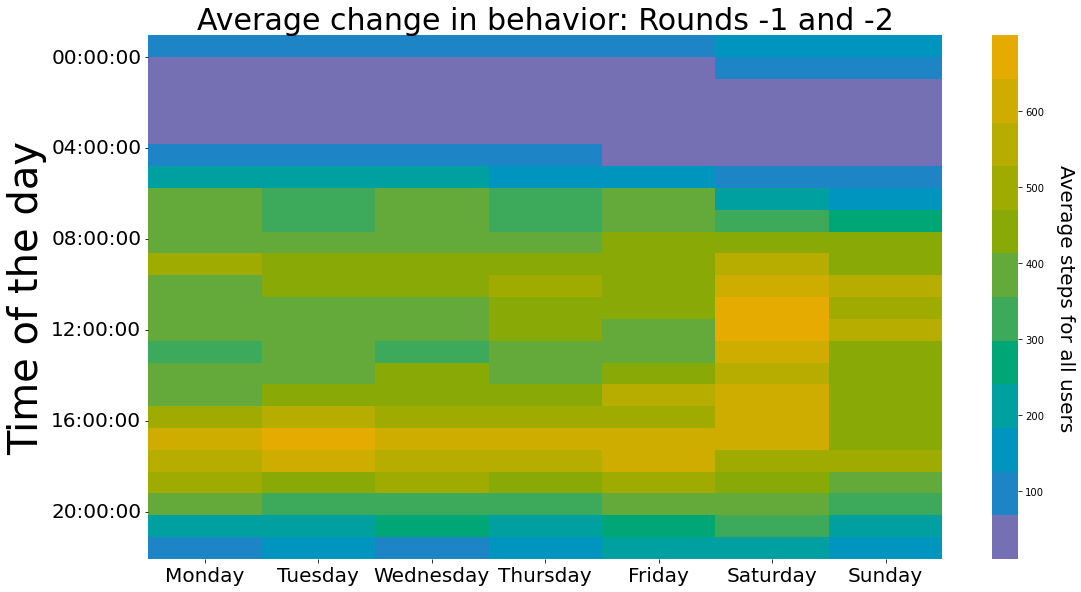

In [43]:
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(piv, cmap=cmap)
plt.tight_layout()
ax.yaxis.set_major_locator(md.HourLocator(interval = 100))
ax.yaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel('',size=30)
#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"
plt.ylabel('Time of the day',fontsize=40)
plt.title('Average change in behavior: Rounds -1 and -2',fontsize=30)
plt.text(8, 18, 'Average %s for all users'%typee, fontsize=20, rotation=270)
plt.show()

# Exercise - When do people exercise more? 

In [44]:
# Loading the data
infile = open('../data/users_exercise_hourly','rb')
df = pickle.load(infile)
infile.close()

df.head()

,id,date,activityType,duration
0,621e314867b776a24029ebf9,2015-09-22 22:00:38,Run,1851000.0
1,621e314867b776a24029ebf9,2015-09-24 19:22:00,Run,1041000.0
2,621e314867b776a24029ebf9,2015-09-26 23:48:00,Running (Endomondo),1789000.0
3,621e314867b776a24029ebf9,2015-09-27 20:54:00,Walking (Endomondo),4572000.0
4,621e314867b776a24029ebf9,2015-09-28 22:23:00,Running (Endomondo),1640000.0


In [45]:
df_new = df.copy()
df1 = df_new[(df_new['date'] >= "2021-05-24") & (df_new['date'] <= "2021-07-26")] #Round1
df2 = df_new[(df_new['date'] >= "2021-11-15") & (df_new['date'] <= "2022-01-17")] #Round2

df=df1.append(df2)

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_4728/4009428067.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [46]:
df.shape[0]

3250

In [47]:
#df.reset_index(inplace=True)
# Preprocessing 
df['dateTime'] = pd.to_datetime(df.date, format='%m/%d/%y %H:%M:%S')
df['duration'] = pd.to_numeric(df['duration'])
df = df.astype({"id": str})
df['date'] = df['dateTime'].dt.date
df['hour'] = df['dateTime'].dt.hour
df['day'] = df["dateTime"].dt.day_name()
df

,id,date,activityType,duration,dateTime,hour,day
35,621e326767b776a24012e179,2021-05-24,Camminata,1587000.0,2021-05-24 07:20:46,7,Monday
49,621e32af67b776a24045b4cf,2021-05-24,Workout,377000.0,2021-05-24 08:07:32,8,Monday
50,621e32af67b776a24045b4cf,2021-05-24,Walk,1486000.0,2021-05-24 08:44:53,8,Monday
24,621e2e8e67b776a24055b564,2021-05-24,Walk,1740000.0,2021-05-24 10:40:03,10,Monday
26,621e329067b776a2402ffad2,2021-05-24,Walk,2151000.0,2021-05-24 11:12:48,11,Monday
...,...,...,...,...,...,...,...
89,621e320b67b776a240d36a07,2022-01-16,Gång,1126000.0,2022-01-16 13:45:22,13,Sunday
35,621e30b267b776a240c5e13f,2022-01-16,Walk,973000.0,2022-01-16 16:10:59,16,Sunday
58,621e339967b776a240e502de,2022-01-16,Circuito de entrenamiento,2061000.0,2022-01-16 16:41:43,16,Sunday
36,621e30b267b776a240c5e13f,2022-01-16,Walk,1280000.0,2022-01-16 16:54:30,16,Sunday


In [48]:
exercise_counts = df.groupby(['day', 'hour'])['activityType'].count()
exercise_counts

day        hour
Friday     0        3
           3        2
           4        1
           5        1
           6       10
                   ..
Wednesday  19      55
           20      31
           21      21
           22      10
           23       7
Name: activityType, Length: 155, dtype: int64

<AxesSubplot:>

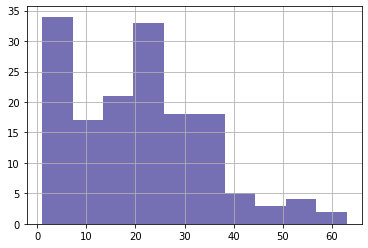

In [49]:
exercise_counts.hist()

In [50]:
exercise_counts = exercise_counts.reset_index(drop=False)
exercise_counts

,day,hour,activityType
0,Friday,0,3
1,Friday,3,2
2,Friday,4,1
3,Friday,5,1
4,Friday,6,10
...,...,...,...
150,Wednesday,19,55
151,Wednesday,20,31
152,Wednesday,21,21
153,Wednesday,22,10


In [51]:
# Rearranging the dataframe for the heatmap
days = exercise_counts['day']
hours = exercise_counts['hour']
freq = exercise_counts['activityType']
df = pd.concat([days, hours, freq], axis=1)

exercise_counts.day = pd.Categorical(exercise_counts.day,categories=weekdays)
exercise_counts = exercise_counts.sort_values('day')

piv = pd.pivot_table(exercise_counts, values='activityType', index=["hour"], columns=["day"], fill_value=0)

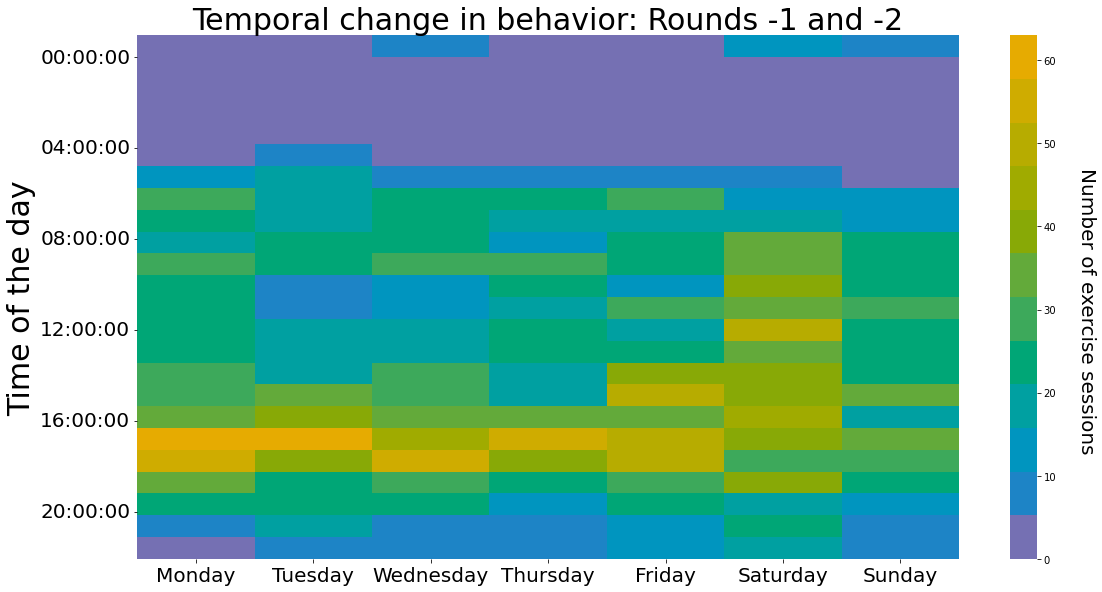

In [52]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(piv, cmap=cmap)
plt.tight_layout()
ax.yaxis.set_major_locator(md.HourLocator(interval=100))
ax.yaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
plt.text(8, 19, 'Number of exercise sessions', fontsize=20, rotation=270)
plt.xticks(size=20)
plt.yticks(size=20, rotation=360)
plt.xlabel('', size=30)
plt.ylabel('Time of the day', fontsize=30)
plt.title('Temporal change in behavior: Rounds -1 and -2', fontsize=30)
plt.show()